# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.212275e+01     7.815612e+00
 * time: 0.00450897216796875
     1     3.117216e+01     5.838461e+00
 * time: 0.013052940368652344
     2     2.783667e+01     1.158367e+01
 * time: 0.03346586227416992
     3     2.299616e+01     9.496513e+00
 * time: 0.05932784080505371
     4     1.284643e+01     1.640165e+00
 * time: 0.08691191673278809
     5     1.130647e+01     1.474846e+00
 * time: 0.10728788375854492
     6     1.089938e+01     1.376480e+00
 * time: 0.12315988540649414
     7     1.053711e+01     1.123659e+00
 * time: 0.13978195190429688
     8     1.028319e+01     9.977241e-01
 * time: 0.15597987174987793
     9     1.000139e+01     7.021987e-01
 * time: 0.17164087295532227
    10     9.786982e+00     6.033997e-01
 * time: 0.18748879432678223
    11     9.611400e+00     6.221400e-01
 * time: 0.2042398452758789
    12     9.514778e+00     4.851951e-01
 * time: 0.2207808494567871
    13     9.453231e+00     5.165588e-01
 * time: 

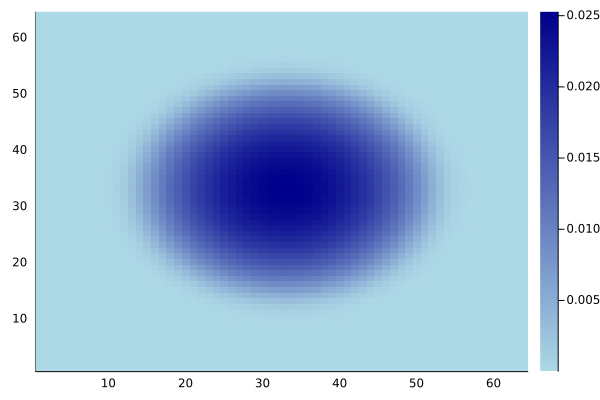

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)